In [1]:
import itertools as it
from iterdub import iterdub as ib
from iterpop import iterpop as ip
from keyname import keyname as kn
from matplotlib import pyplot as plt
import matplotlib
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import patchworklib as pw
import pathlib
import random
from scipy import stats
import seaborn as sns
from slugify import slugify
import statsmodels.api as sm
import statsmodels.formula.api as smf
from teeplot import teeplot as tp
from tqdm import tqdm


<Figure size 72x72 with 0 Axes>

In [2]:
np.random.seed(1)
random.seed(1)


In [3]:
from conduitpylib.viz import _get_defaults as cfg
from conduitpylib.viz import (
    get_notomoji_font_path,
    performance_semantics_scatterplot,
    performance_semantics_facetplot,
)
from conduitpylib.wrangle import retrieve_and_prepare_delta_dataframes


In [4]:
nbm.print_metadata()


context: ci
hostname: e75b2d7f33e4
interpreter: 3.8.10 (default, Nov 22 2023, 10:22:35)  [GCC 9.4.0]
nbcellexec: 4
nbname: None
nbpath: None
revision: null
session: bb2c75f1-0c90-41db-8e8e-3d1cc5837157
timestamp: 2023-11-30T19:22:21Z00:00


IPython==7.16.1
keyname==0.5.6
yaml==5.4.1
iterdub==0.2.0
iterpop==0.3.4
matplotlib==3.5.2
nbmetalog==0.2.6
numpy==1.23.5
pandas==1.1.2
patchworklib==0.6.3
scipy==1.5.4
seaborn==0.13.0
statsmodels==0.12.2
teeplot==0.6.1
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.2.1
json==2.0.9
six==1.15.0
ipykernel==5.5.3


# Get Data


In [5]:
def apply(df: pd.DataFrame) -> pd.DataFrame:
    row_distiller = lambda row: {
        k: v for k, v in row.items() if k in ("Num Nodes", "Num Processes")
    }
    df["Multiprocessing"] = df.apply(
        lambda row: {
            frozenset(
                {"Num Nodes": 1, "Num Processes": 2}.items()
            ): "Intranode",
            frozenset(
                {"Num Nodes": 2, "Num Processes": 2}.items()
            ): "Internode",
        }[frozenset(row_distiller(row).items())],
        axis=1,
    )
    return df


longitudinal, snapshot = retrieve_and_prepare_delta_dataframes(
    df_inlet_url="https://osf.io/4ys9v/download",
    df_outlet_url="https://osf.io/aum7w/download",
    apply=apply,
    treatment_column="Multiprocessing",
)


a: df_inlet
digest: 88ea77703064cb719aeda435a8ce9b2a07b6f22418808c27ef05c3f5bce64932
num cols: 42
num cols all na: 2
num cols any na: 42
num na: 1102
num rows: 521
num rows all na: 1
num rows any na: 521
size: 407K

a: df_outlet
digest: 8fcf036a2446e952bf3bafdbf5f4e9b45cdd9f566a38ec513e19fbe98353d22b
num cols: 68
num cols all na: 6
num cols any na: 68
num na: 3220
num rows: 521
num rows all na: 1
num rows any na: 521
size: 514K

df_inlet has 1 na rows, dropping them
df_outlet has 1 na rows, dropping them


100%|██████████| 2/2 [00:00<00:00, 59.09it/s]


teeplots/./allocation=internode+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=internode+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


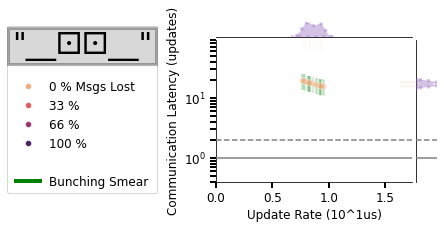

100%|██████████| 2/2 [00:00<00:00, 59.15it/s]


teeplots/./allocation=intranode+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=intranode+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


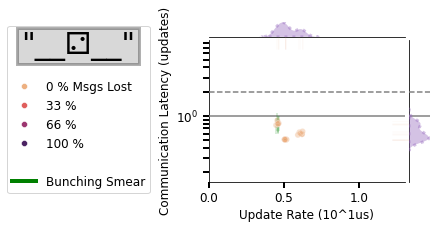

100%|██████████| 12/12 [00:00<00:00, 52.81it/s]


teeplots/./allocation=internode+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=internode+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


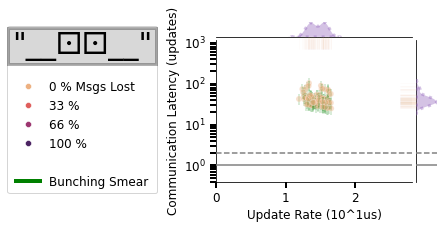

100%|██████████| 12/12 [00:00<00:00, 75.48it/s]


teeplots/./allocation=intranode+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=intranode+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


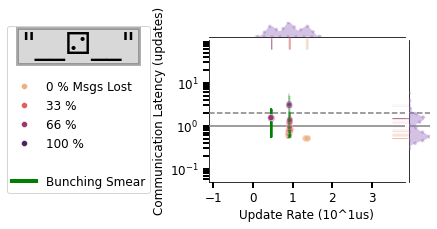

In [6]:
for data in "longitudinal", "snapshot":
    for allocation, group in eval(data).groupby("Multiprocessing"):
        group_df = group.reset_index()
        tp.tee(
            performance_semantics_scatterplot,
            data=group_df,
            x="Simstep Period Inlet (ns)",
            y="Latency Simsteps Inlet",
            heat="% Msgs Lost",
            legend_font_name=get_notomoji_font_path(),
            title="__{}__".format(
                {
                    "Intranode": "⚁",
                    "Internode": "⚀⚀",
                }[allocation]
            ),
            batch_kwargs={
                "batch_size": 10,
                "progress_apply": tqdm,
            },
            bunching_smear_alpha=0.2,
            scatter_kwargs={
                "alpha": 0.4,
            },
            teeplot_outattrs={
                "allocation": slugify(allocation),
                "data": slugify(data),
            },
        )
        plt.show()


teeplots/./data=longitudinal+hue=multiprocessing+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./data=longitudinal+hue=multiprocessing+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


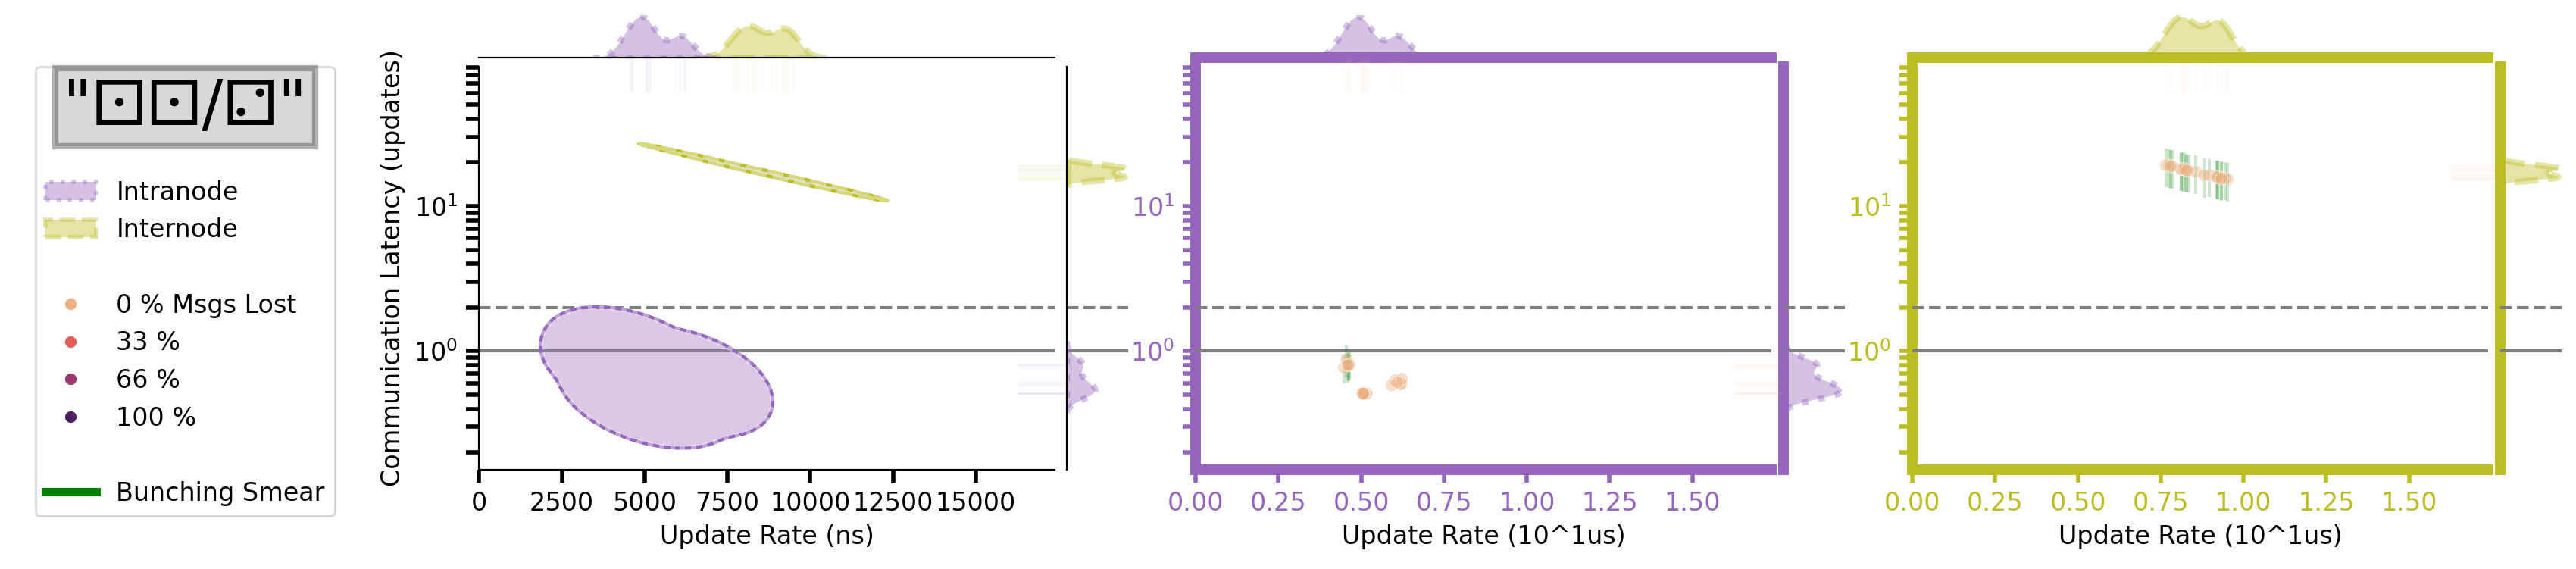

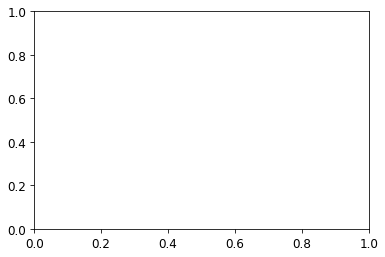

teeplots/./data=snapshot+hue=multiprocessing+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./data=snapshot+hue=multiprocessing+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


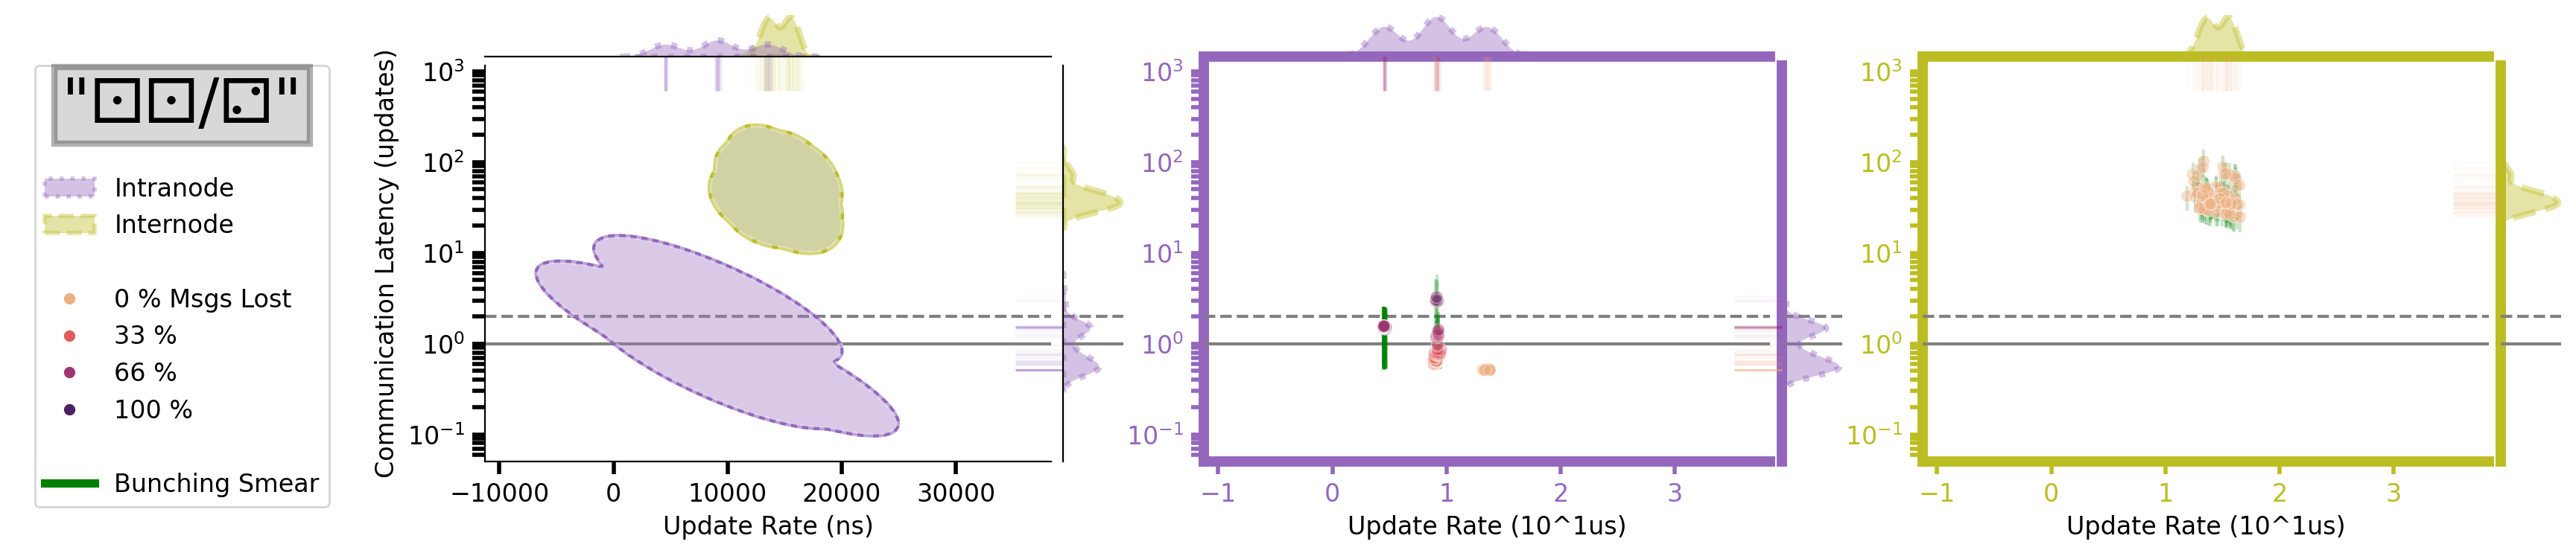

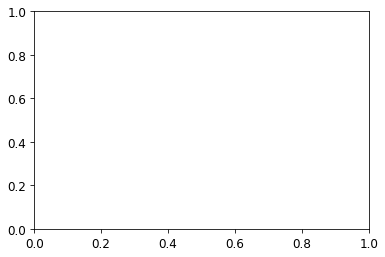

In [7]:
for data in "longitudinal", "snapshot":
    plt.clf()
    with pw.patched_axisgrid():
        facetplot = tp.tee(
            performance_semantics_facetplot,
            data=eval(data),
            x="Simstep Period Inlet (ns)",
            y="Latency Simsteps Inlet",
            hue="Multiprocessing",
            hue_order=["Intranode", "Internode"],
            legend_font_name=get_notomoji_font_path(),
            title="⚀⚀/⚁",
            teeplot_outattrs={
                "data": slugify(data),
            },
        )
        display(facetplot)
        plt.show()
